In [34]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [35]:
#Création d'une fonction pour redimensionner une image
def resize(img, largeur, hauteur):
    return cv2.resize(img,(largeur,hauteur),interpolation=cv2.INTER_AREA)

#Création d'une fonction pour retourner une image
def rotate(img, sens):
    return cv2.flip(img, sens)

#Convertir l'image en niveau de gris
def convertGrayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#Copier une image RGB vers une autre
def copyToImage(imgA, imgB, offsetX, offsetY):
    for i in range (imgA.shape[0]):
        for j in range (imgA.shape[1]):
            imgB[i+offsetX, j+offsetY, 0] = imgA[i,j,0]
            imgB[i+offsetX, j+offsetY, 1] = imgA[i,j,1]
            imgB[i+offsetX, j+offsetY, 2] = imgA[i,j,2]

#Copier une image en niveau de gris vers une autre
def imageTo3ChannelImage(img):
    imgRes = np.zeros([img.shape[0], img.shape[1], 3], np.uint8)
    for i in range (img.shape[0]):
        for j in range (img.shape[1]):
            imgRes[i, j, 0] = img[i,j]
            imgRes[i, j, 1] = img[i,j]
            imgRes[i, j, 2] = img[i,j]
    return imgRes

def segmentGray(img, seuil, valeurMax, typeSeg):
    _, res = cv2.threshold(img, seuil, valeurMax, typeSeg ) 
    return res

In [36]:
#Lire l'image du crochet et l'afficher
fichier = "crochet.jpg"
img = cv2.imread(fichier, cv2.IMREAD_COLOR)
cv2.imshow("Image originale", img)
cv2.waitKey(0)

-1

In [37]:
imgHSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("Resultat", imgHSV)
cv2.waitKey(0)

-1

In [58]:
def copyChannelToImage(img, channel):
    return img[:, :, channel]

def segmentByHue(imgHSV, low_H, high_H):
    # Segmenter uniquement sur le canal H
    valeurMinimale = (low_H, 0, 0)
    valeurMaximale = (high_H, 255, 255)
    masque = cv2.inRange(imgHSV, valeurMinimale, valeurMaximale)
    return masque



In [70]:
#Affichage de tous les résultats sur une seule image

#Création de la fenêtre en noire
imgRes = np.zeros([3*img.shape[0], 3*img.shape[1], 3], np.uint8)
#Conversion de l'image HSV en RGB afin de l'afficher
imgHSV_BGR = cv2.cvtColor(imgHSV, cv2.COLOR_HSV2BGR)

#Copie de chaque canal HSV
H_channel = copyChannelToImage(imgHSV, 0)
S_channel = copyChannelToImage(imgHSV, 1)
V_channel = copyChannelToImage(imgHSV, 2)

copyToImage(img, imgRes, 0, 0)
copyToImage(imgHSV_BGR, imgRes, 0, img.shape[1])
copyToImage(rotate(imgHSV_BGR, 0), imgRes, 0, img.shape[1]*2)
copyToImage(imageTo3ChannelImage(H_channel), imgRes, img.shape[0], 0)
copyToImage(imageTo3ChannelImage(S_channel), imgRes, img.shape[0], img.shape[1])
copyToImage(imageTo3ChannelImage(V_channel), imgRes, img.shape[0], img.shape[1]*2)
cv2.imshow("Resultat", imgRes)
cv2.waitKey(0)

-1

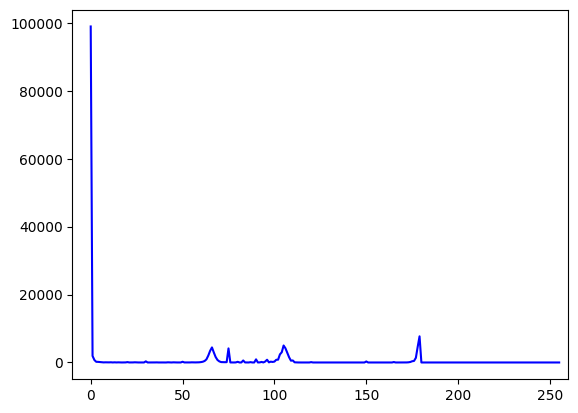

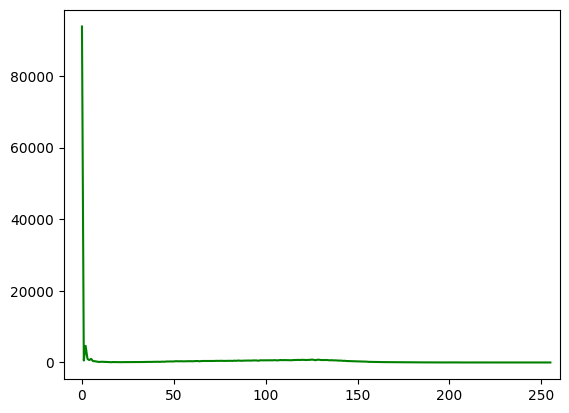

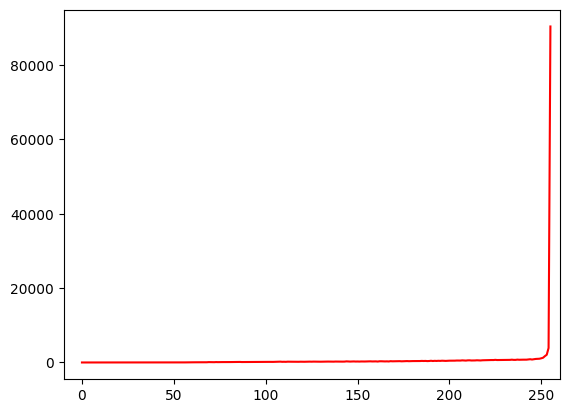

In [51]:
#Création d'un histogramme pour afficher les différents canaux
#Histogramme par une boucle
colors = ('b','g','r') 
for i, col in enumerate(colors):
    histogramme = cv2.calcHist([imgHSV],[i],None,[256],[0,256])
    plt.plot(histogramme, color=col)
    plt.xlim([-10,260])
    plt.show()

In [73]:
masque = segmentByHue(imgHSV, 30, 70) 

# Créer une fenêtre 
imgRes = np.zeros([3*img.shape[0], 3*img.shape[1], 3], np.uint8)

# Convertir chaque masque en image RGB
copyToImage(imageTo3ChannelImage(masque), imgRes, img.shape[0], 0)

cv2.imshow("Segmentation par canal H", imgRes)
cv2.waitKey(0)

-1